In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

df=pd.read_csv("playgolf_data (1) (1).csv")
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [16]:
print(df.isnull().sum())


Outlook        0
Temperature    0
Humidity       0
Wind           0
PlayGolf       0
dtype: int64


In [17]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

0
0


In [18]:
x = df.iloc[ :, :-1].values
y = df.iloc[ :, -1].values
print(x,"\n")
print(y,"\n")

[['Sunny' 'Hot' 'High' 'Weak']
 ['Sunny' 'Hot' 'High' 'Strong']
 ['Overcast' 'Hot' 'High' 'Weak']
 ['Rainy' 'Mild' 'High' 'Weak']
 ['Rainy' 'Cool' 'Normal' 'Weak']
 ['Rainy' 'Cool' 'Normal' 'Strong']
 ['Overcast' 'Cool' 'Normal' 'Strong']
 ['Sunny' 'Mild' 'High' 'Weak']
 ['Sunny' 'Cool' 'Normal' 'Weak']
 ['Rainy' 'Mild' 'Normal' 'Weak']
 ['Sunny' 'Mild' 'Normal' 'Strong']
 ['Overcast' 'Mild' 'High' 'Strong']
 ['Overcast' 'Hot' 'Normal' 'Weak']
 ['Rainy' 'Mild' 'High' 'Strong']] 

['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No'] 



In [19]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [20]:
x = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
# feature_names = x.columns

feature_names = x.columns

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train Decision Tree model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(x_train_scaled, y_train)

# Make predictions
y_pred = model.predict(x_test_scaled)

# Evaluation
print("Predicted values:", y_pred, "\n")
print("Accuracy_score:", accuracy_score(y_test, y_pred), "\n")
print("Classification_report:\n", classification_report(y_test, y_pred))


Predicted values: ['Yes' 'No' 'No' 'Yes' 'Yes'] 

Accuracy_score: 0.6 

Classification_report:
               precision    recall  f1-score   support

          No       0.50      0.50      0.50         2
         Yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



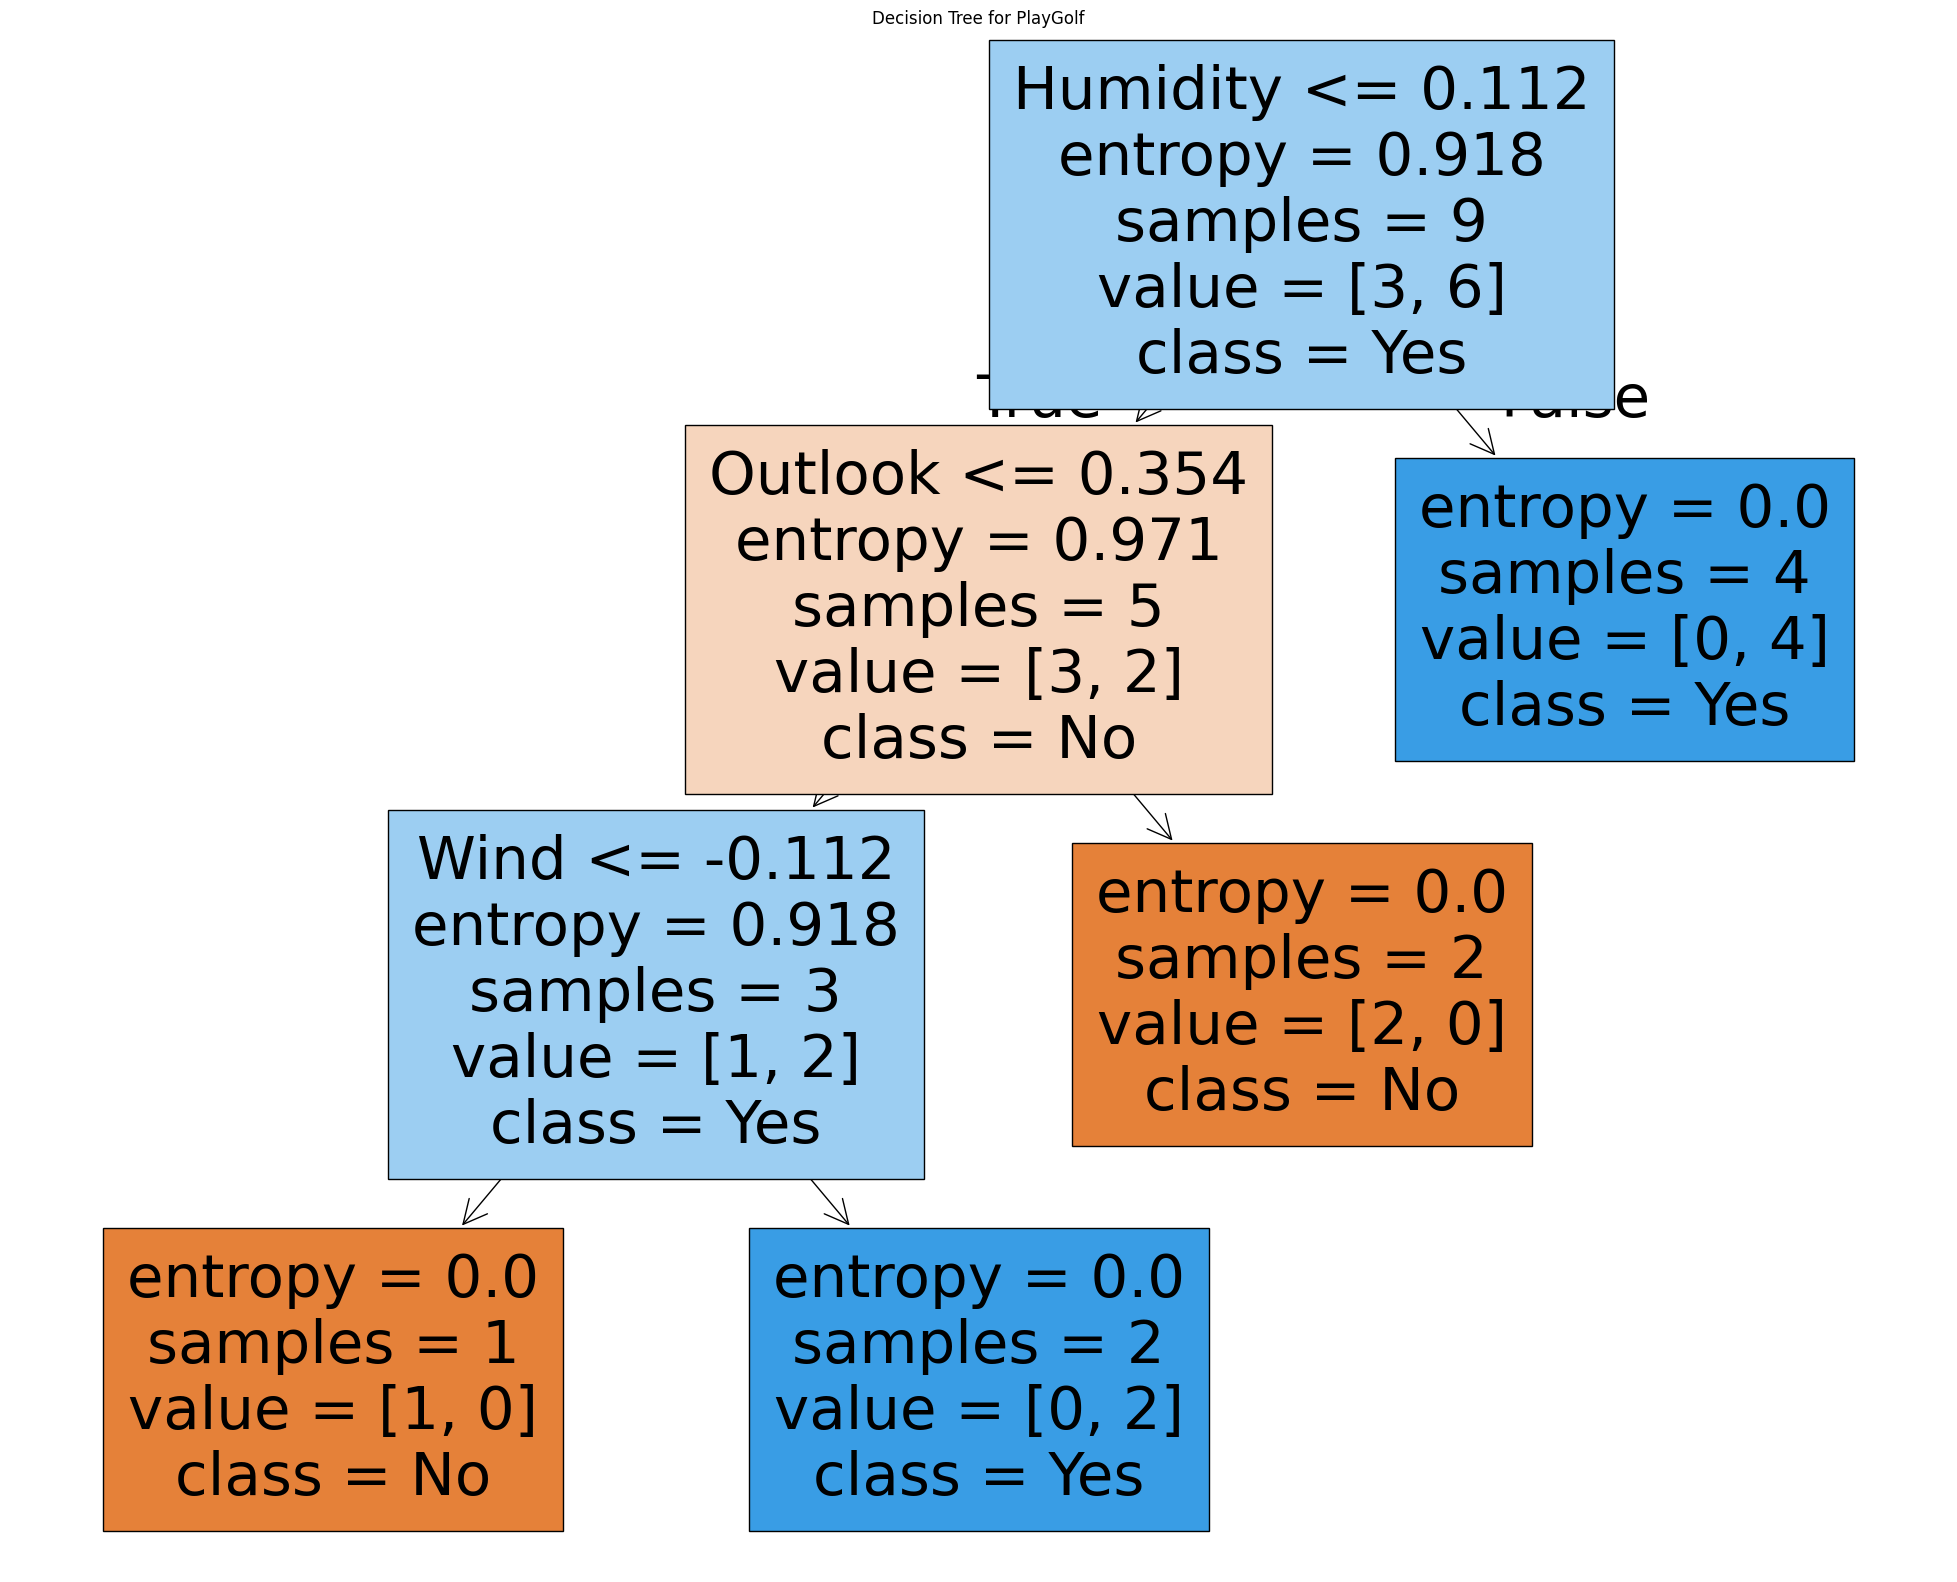

In [21]:
plt.figure(figsize=(25, 20))
tree.plot_tree(model, feature_names=x.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree for PlayGolf")
plt.show()

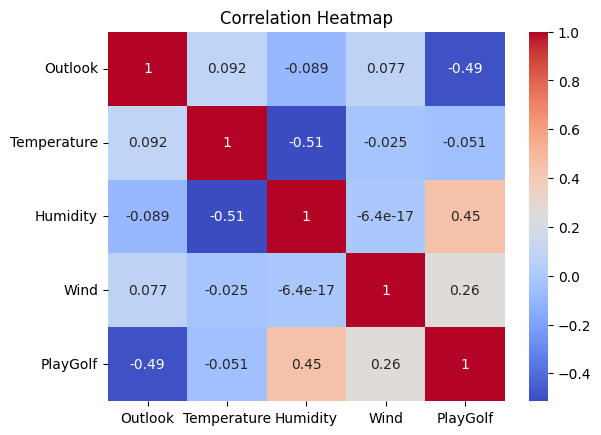

In [24]:
from sklearn.preprocessing import LabelEncoder
encoded_df = df.copy()
for col in encoded_df.columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

# Correlation heatmap
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [22]:
import joblib
joblib.dump(model, "playgolf.pkl")
#joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")
print("Model and label encoder saved successfully!")


Model and label encoder saved successfully!


In [23]:
import joblib

# Load saved model and label encoder
model = joblib.load("playgolf.pkl")
le = joblib.load("label_encoder.pkl")

# Manual encoding mappings from your training
feature_mappings = {
    'Outlook': {'Overcast': 0, 'Rainy': 1, 'Sunny': 2},
    'Temperature': {'Cool': 0, 'Hot': 1, 'Mild': 2},
    'Humidity': {'High': 0, 'Normal': 1},
    'Wind': {'Strong': 0, 'Weak': 1}
}

# Raw input (human-readable)
sample_input = ['Rainy', 'Cool', 'High', 'Weak']

# Encode manually using the mappings
encoded_input = [
    feature_mappings['Outlook'][sample_input[0]],
    feature_mappings['Temperature'][sample_input[1]],
    feature_mappings['Humidity'][sample_input[2]],
    feature_mappings['Wind'][sample_input[3]]
]

# Predict using the model
prediction = model.predict([encoded_input])

# Decode the output using the label encoder
predicted_result = prediction[0]

# predicted_result = le.inverse_transform(prediction)[0]

print("PlayGolf Prediction:", predicted_result)


PlayGolf Prediction: No
